- Assign multiple multiple `DataFrame`
- add `Year` column and assing `int` type corresponding year 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
happiness2015 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2015.csv')
happiness2016 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2016.csv')
happiness2017 = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/World_Happiness_2017.csv')

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017
happiness2015.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


- `pd.concat()` function 
- axis = 0 row concat. This is default. e.g row2 and row3 concat
- axis = 1 col concat. e.g col1 and col2 concat
- syntax: `pd.concat([df1, df2])` since `concat` is function, we use conventionally `pd`

Let's examine `happiness2015` and `happiness2016` dataframe

In [2]:
head_2015 = happiness2015[['Country', 'Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country', 'Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

# count number of rows
# question1 = len(concat_axis0)
# question2 = len(concat_axis1)
# number of rows, same result as above
question1 = len(concat_axis0.index)
question2 = len(concat_axis1.index)


#  can count columns
question3 = len(concat_axis0.columns)
question4 = len(concat_axis1.columns)

print(question1, question2, question3, question4)

6 3 3 6


let's concat different shapes of two dataframe

In [3]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0, sort=True)

rows = len(concat_axis0.index)
columns = len(concat_axis0.columns)
concat_axis0

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


`ignore_index` reset the index

In [4]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

#ignore_index=True
concat_update_index = pd.concat([head_2015, head_2016], axis=0, sort=True, ignore_index=True)
concat_update_index

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


- `merge` function to merge using `Country` keyword
- only combines the common values from the keyword
- `pd.merge(left=df1, right=df2, on='Col_Name'))` `Col_Name` is key to join the dataFrame
- `merge` function only combines dataframe horizantally (axis=1)

In [5]:
# iloc[2:5], using just three rows

three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
print(three_2015)
print(three_2016)
merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged




   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


- Inner join: intersection
- Outer join: Union, same as `concat`
- Left Join: include all of the rows of left and "right" of common
- Right Join: include all of the rows of right and "left" of common
- Inner and left join are common usage


In [6]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
print(three_2015)
print(three_2016)
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
print(merged_left)
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')
print(merged_left_updated)

   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


using `suffixes=( , )` to change `_x` and `_y`

In [7]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')

merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left'
                           , on='Country', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left'
                                   , on='Country', suffixes=('_2016','_2015'))
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


- inner join 4 rows dataset with 3 rows
- `left_index = True`, `right_index=True` indicates inner join

In [8]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

# inner join left and right returns 3 rows with same index number
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True
                       , suffixes = ('_2015','_2016'))
rows = len(merge_index.index)
colmuns = len(merge_index.columns)

# innter join on Left returns 4 rows. missing index of right will return 'NaN'
merge_index_left = pd.merge(left = four_2015, right = three_2016, how='left',left_index=True, right_index=True, suffixes=('_2015','_2016'))
rows = len(merge_index_left.index)
columns = len(merge_index_left.columns)
print(merge_index)
print(merge_index_left)

  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   

   Happiness Rank_2016  Year_2016  
2                    3       2016  
3                    4       2016  
4                    5       2016  
  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   
5      Finland                    6       2015          NaN   

   Happiness Rank_2016  Year_2016  
2                  3.0     2016.0  
3                  4.0     2016.0  
4                  5.0     2016.0  
5                  NaN        NaN  


## merge type
- Merge (Join on Columns) merge(left = df1, right = df2, how = 'join_type', on = 'Col')
- Merge (Join on Index) merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)

use a pivot table to aggregate the data according to Region

In [29]:
means = happiness2015.pivot_table('Happiness Score', index='Region', aggfunc=np.mean)
print(means)

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619


`# use the df.plot() method to plot the result.
means.plot(kind='harh', title='Mean Happiness Scores by Region, xlim=(0,10)`

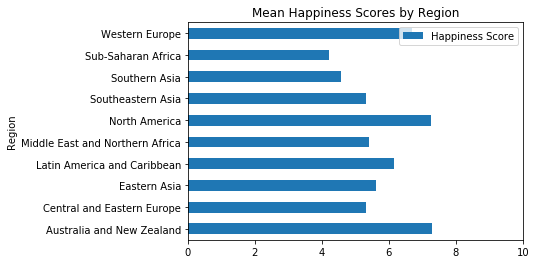

In [10]:
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

let's rename `Happiness Score` to `Happiness.Score`

In [24]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

      Happiness Score
Year                 
2015         5.375734
2016         5.382185
2017         5.354019


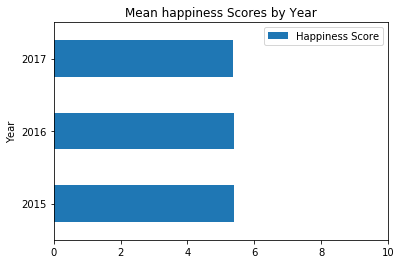

In [28]:
# using concat, combine Vertically axis=0

combined = pd.concat([happiness2015,happiness2016,happiness2017], axis=0, sort=False)
# print(combined)


pivot_table_combined = combined.pivot_table('Happiness Score', 'Year',aggfunc=np.mean)
print(pivot_table_combined)

# using df.plot() to draw
pivot_table_combined.plot(kind='barh', title='Mean happiness Scores by Year', xlim=(0,10))